In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for checking testing results
from sklearn.tree import plot_tree#for visualizing tree 

In [2]:
df = pd.read_csv(r"C:\Users\neetac1973\Downloads\Company_Data.csv")
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [3]:
df.shape

(400, 11)

In [4]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

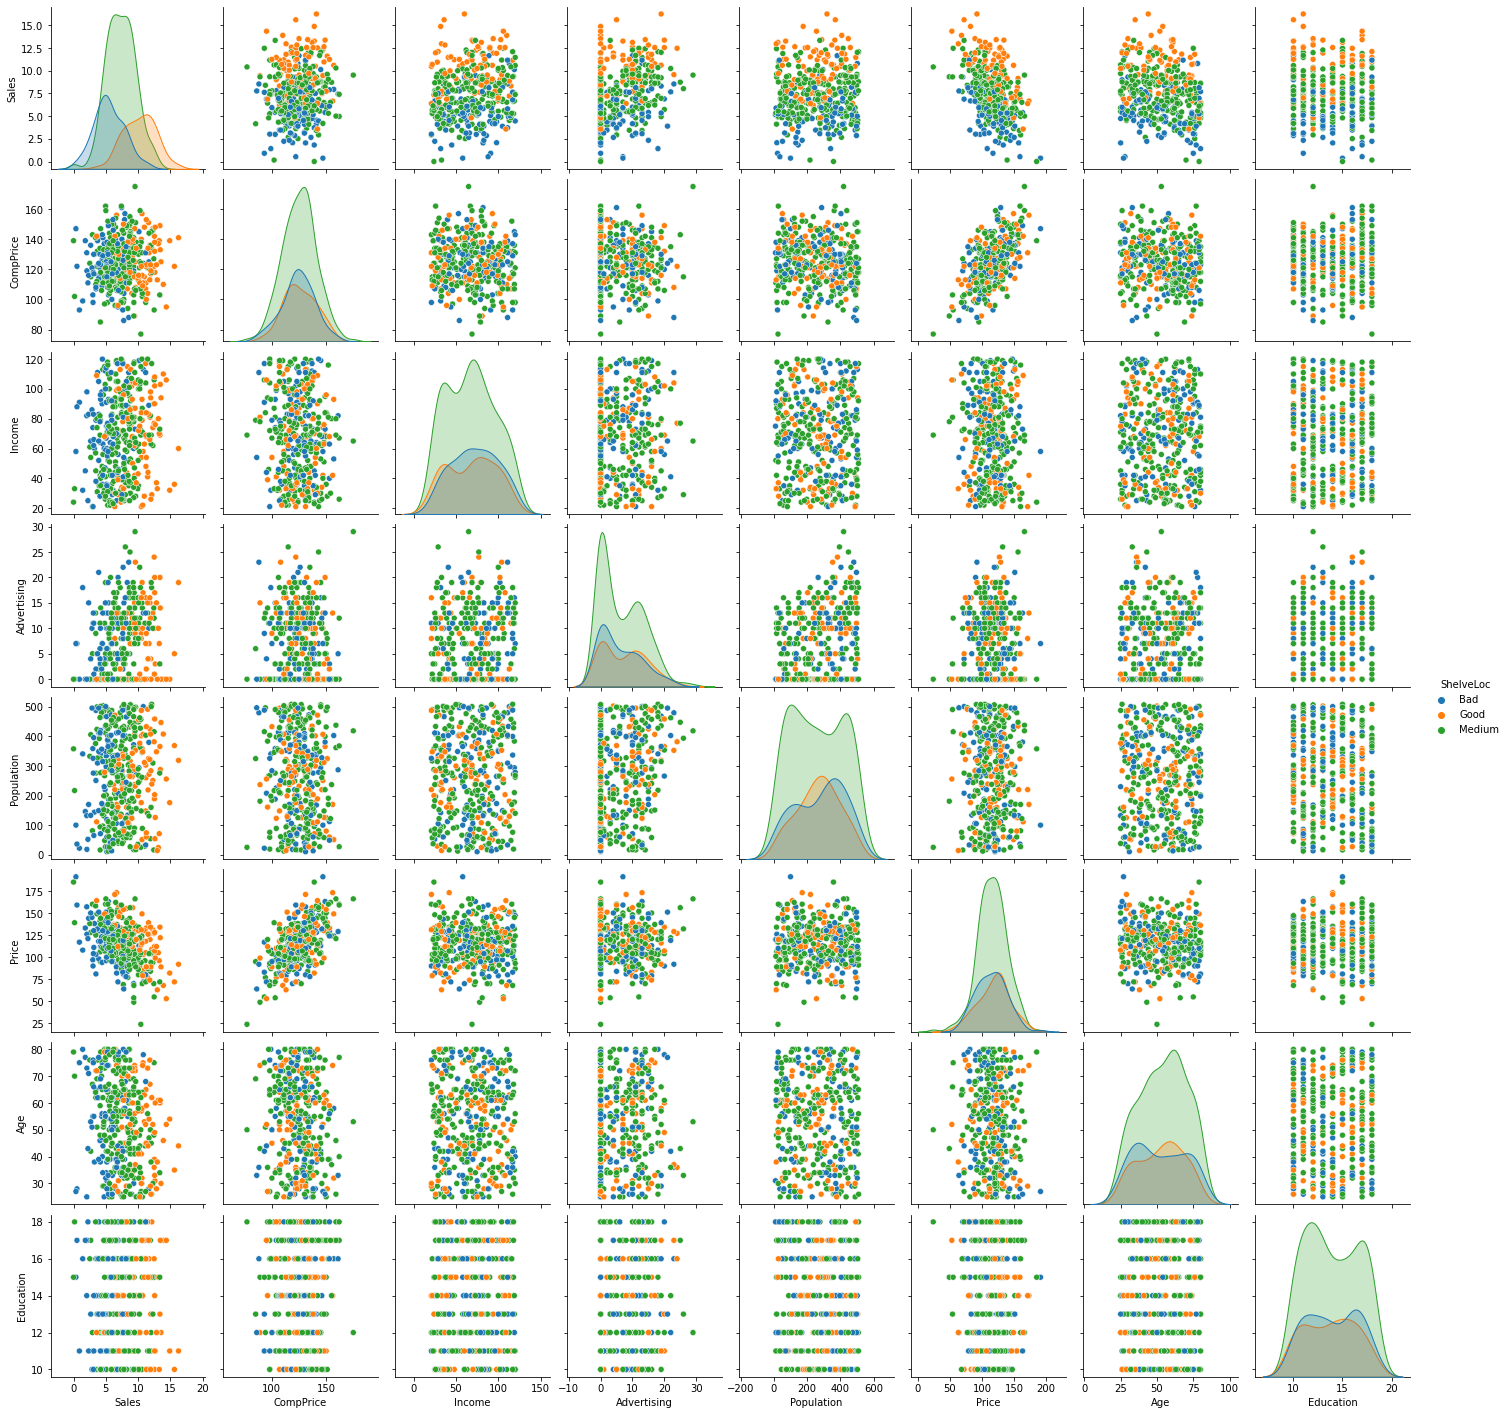

In [5]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'ShelveLoc')

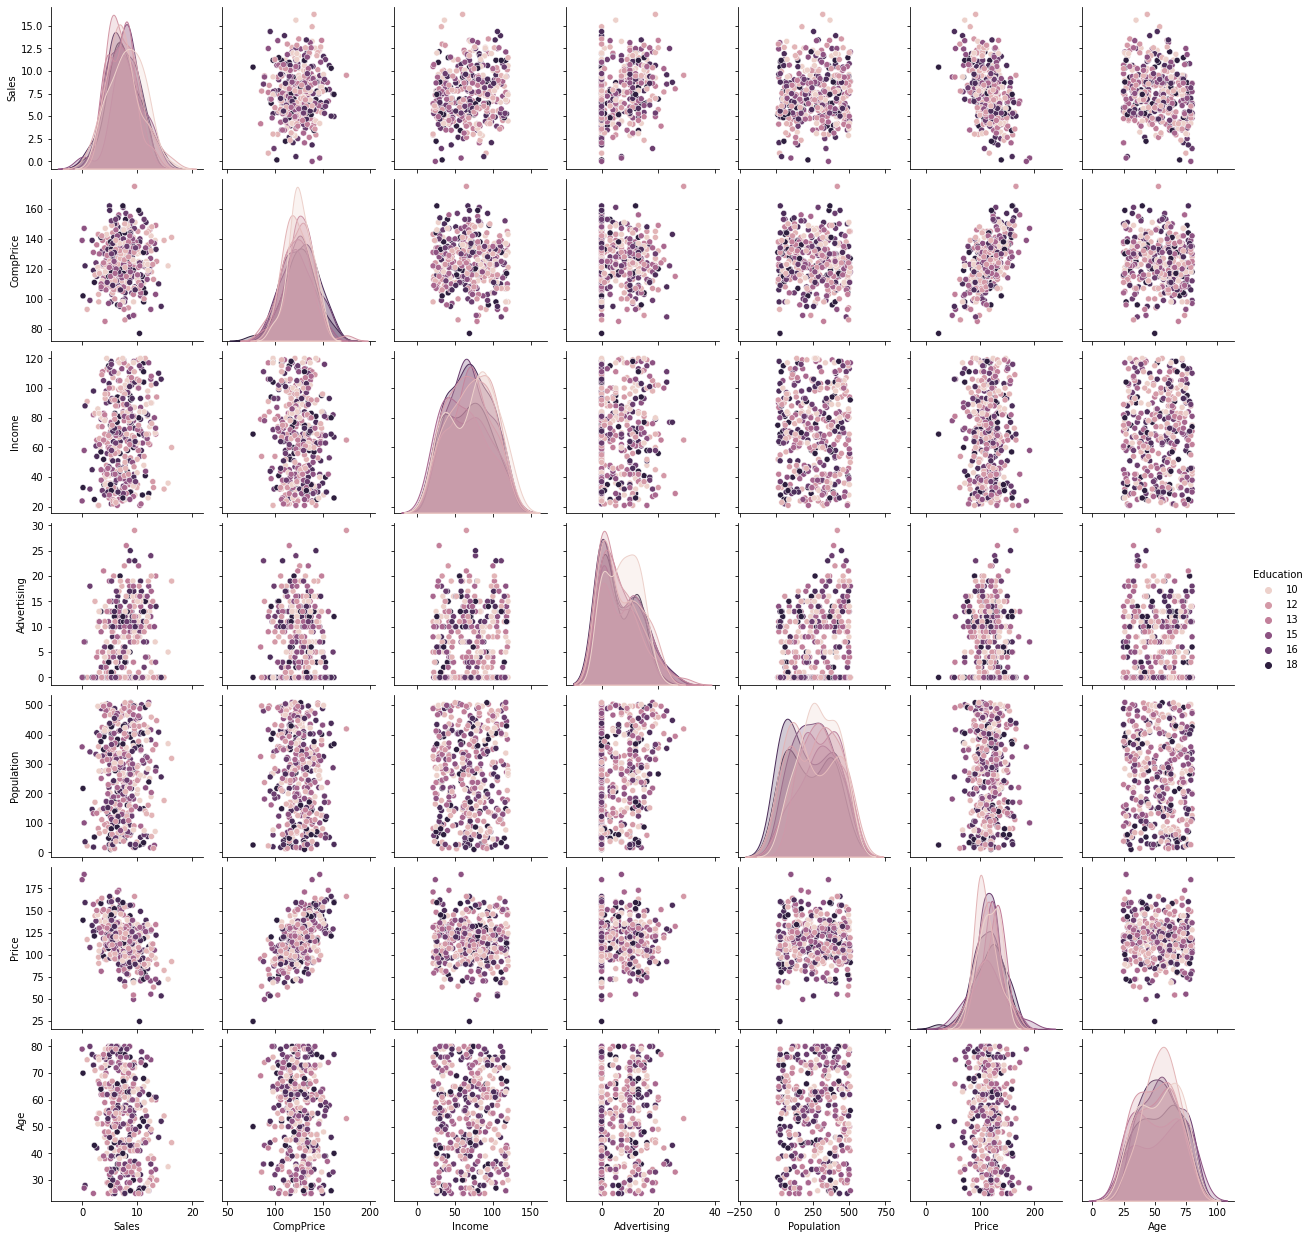

In [7]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'Education')

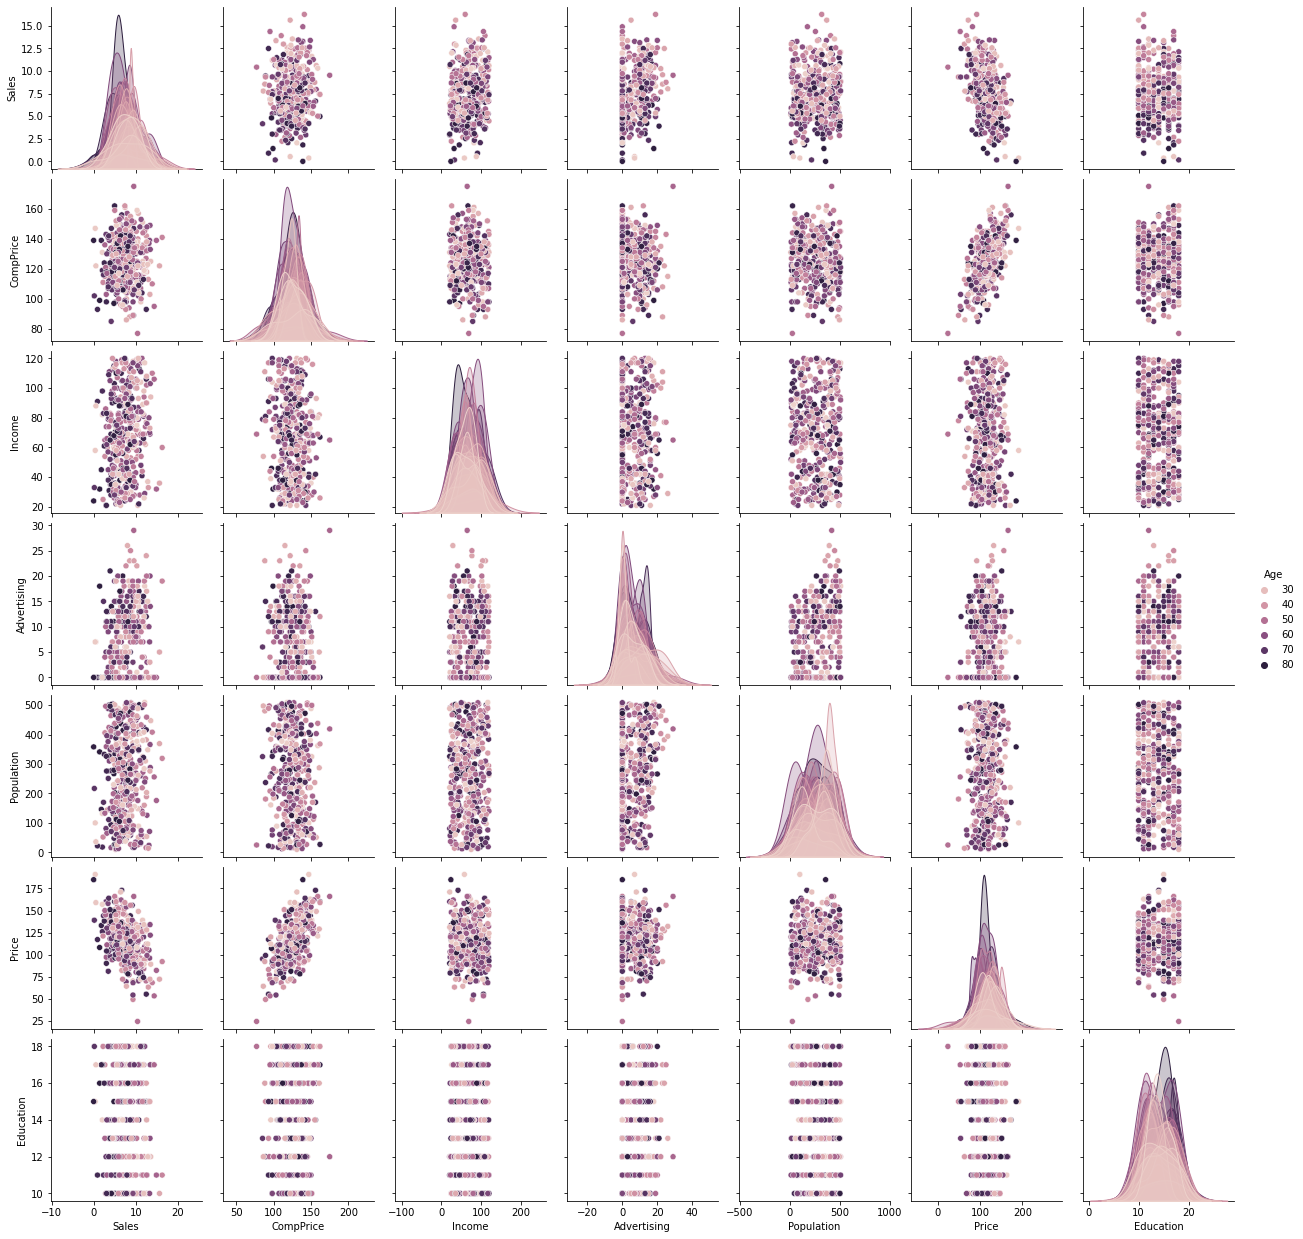

In [8]:
sns.pairplot(data=df, hue = 'Age')

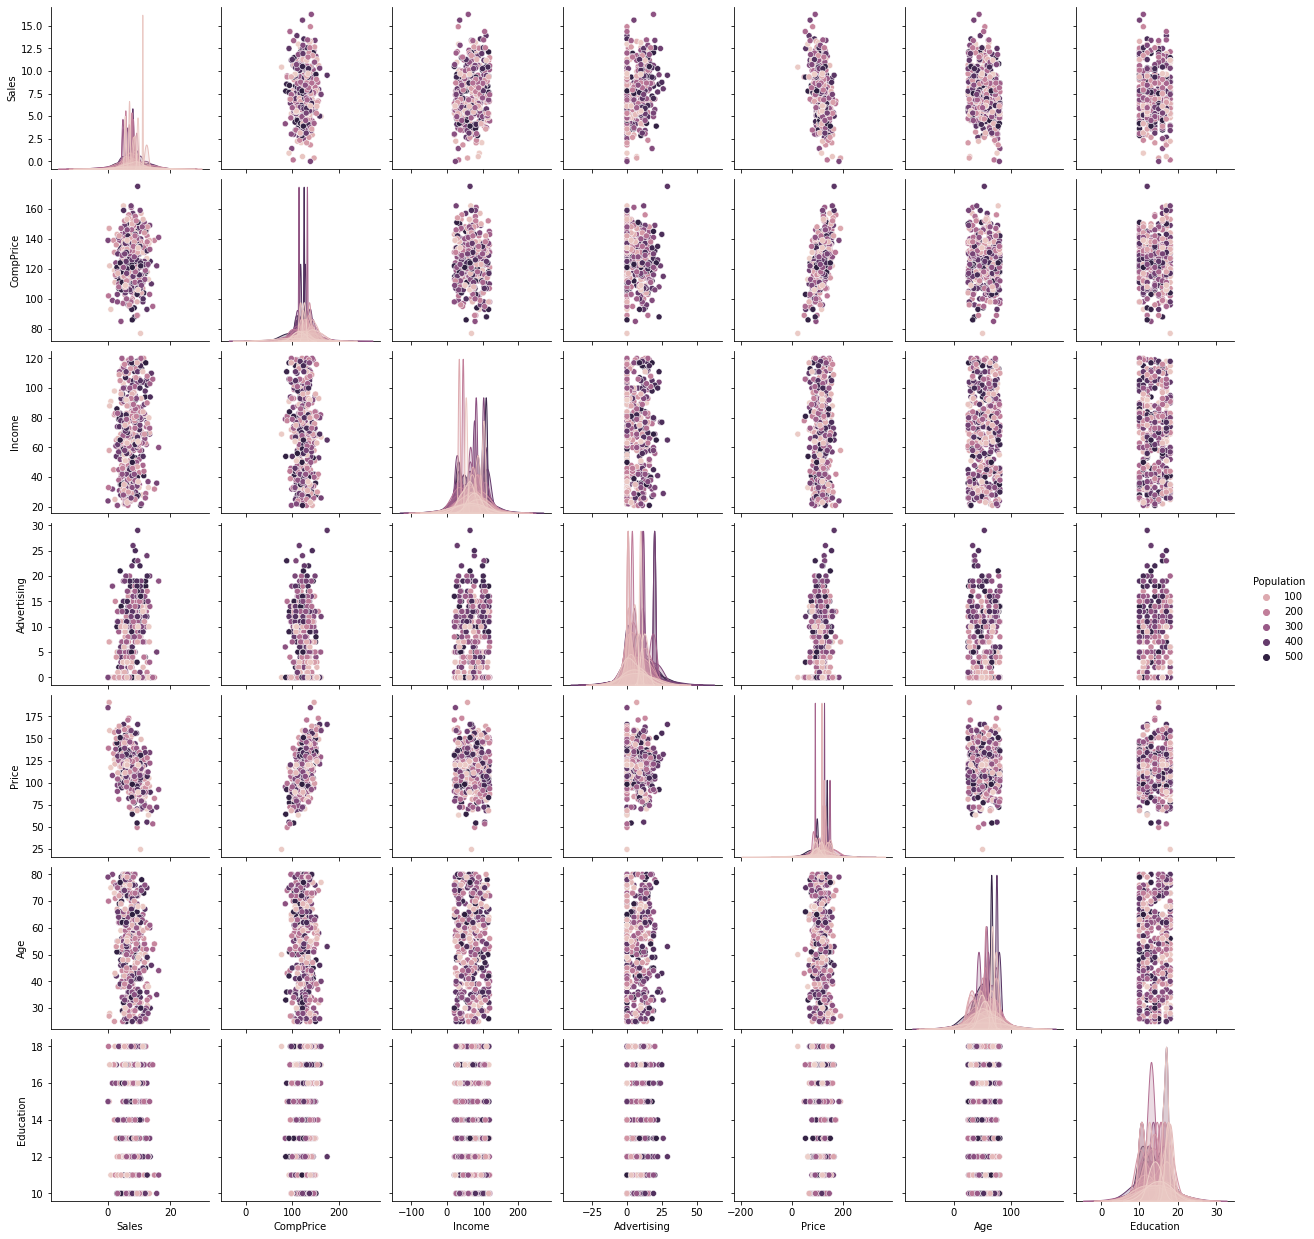

In [9]:
sns.pairplot(data=df, hue = 'Population')

In [10]:
#Creating dummy vairables dropping first dummy variable
df=pd.get_dummies(df,columns=['Price','US'], drop_first=True)

In [11]:
df

Sales  CompPrice  Income  Advertising  Population ShelveLoc  Age  \
0     9.50        138      73           11         276       Bad   42   
1    11.22        111      48           16         260      Good   65   
2    10.06        113      35           10         269    Medium   59   
3     7.40        117     100            4         466    Medium   55   
4     4.15        141      64            3         340       Bad   38   
..     ...        ...     ...          ...         ...       ...  ...   
395  12.57        138     108           17         203      Good   33   
396   6.14        139      23            3          37    Medium   55   
397   7.41        162      26           12         368    Medium   40   
398   5.94        100      79            7         284       Bad   50   
399   9.71        134      37            0          27      Good   49   

     Education Urban  Price_49  ...  Price_160  Price_162  Price_163  \
0           17   Yes         0  ...          0          0          0   
1           10   Yes         0  ...          0          0          0   
2           12   Yes         0  ...          0          0          0   
3           14   Yes         0  ...          0          0          0   
4           13   Yes         0  ...          0          0          0   
..         ...   ...       ...  ...        ...        ...        ...   
395         14   Yes         0  ...          0          0          0   
396         11    No         0  ...          0          0          0   
397         18   Yes         0  ...          0          0          0   
398         12   Yes         0  ...          0          0          0   
399         16   Yes         0  ...          0          0          0   

     Price_164  Price_166  Price_171  Price_173  Price_185  Price_191  US_Yes  
0            0          0          0          0          0          0       1  
1            0          0          0          0          0          0       1  
2            0          0          0          0          0          0       1  
3            0          0          0          0          0          0       1  
4            0          0          0          0          0          0       0  
..         ...        ...        ...        ...        ...        ...     ...  
395          0          0          0          0          0          0       1  
396          0          0          0          0          0          0       1  
397          0          0          0          0          0          0       1  
398          0          0          0          0          0          0       1  
399          0          0          0          0          0          0       1  

[400 rows x 110 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 110 entries, Sales to US_Yes
dtypes: float64(1), int64(6), object(2), uint8(101)
memory usage: 67.7+ KB


In [14]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [15]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [16]:
df.head()

Sales  CompPrice  Income  Advertising  Population  ShelveLoc  Age  \
0   9.50        138      73           11         276          3   42   
1  11.22        111      48           16         260          1   65   
2  10.06        113      35           10         269          2   59   
3   7.40        117     100            4         466          2   55   
4   4.15        141      64            3         340          3   38   

   Education Urban  Price_49  ...  Price_160  Price_162  Price_163  Price_164  \
0         17   Yes         0  ...          0          0          0          0   
1         10   Yes         0  ...          0          0          0          0   
2         12   Yes         0  ...          0          0          0          0   
3         14   Yes         0  ...          0          0          0          0   
4         13   Yes         0  ...          0          0          0          0   

   Price_166  Price_171  Price_173  Price_185  Price_191  US_Yes  
0          0          0          0          0          0       1  
1          0          0          0          0          0       1  
2          0          0          0          0          0       1  
3          0          0          0          0          0       1  
4          0          0          0          0          0       0  

[5 rows x 110 columns]

In [17]:
x=df.iloc[:,0:6]
y=df['ShelveLoc']

In [18]:
x

Sales  CompPrice  Income  Advertising  Population  ShelveLoc
0     9.50        138      73           11         276          3
1    11.22        111      48           16         260          1
2    10.06        113      35           10         269          2
3     7.40        117     100            4         466          2
4     4.15        141      64            3         340          3
..     ...        ...     ...          ...         ...        ...
395  12.57        138     108           17         203          1
396   6.14        139      23            3          37          2
397   7.41        162      26           12         368          2
398   5.94        100      79            7         284          3
399   9.71        134      37            0          27          1

[400 rows x 6 columns]

In [19]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [20]:
df['ShelveLoc'].unique()

array([3, 1, 2], dtype=int64)

In [21]:
df.ShelveLoc.value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [22]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'Price_49',
 'Price_53',
 'Price_54',
 'Price_55',
 'Price_63',
 'Price_64',
 'Price_68',
 'Price_69',
 'Price_70',
 'Price_72',
 'Price_74',
 'Price_77',
 'Price_78',
 'Price_79',
 'Price_80',
 'Price_81',
 'Price_82',
 'Price_83',
 'Price_84',
 'Price_86',
 'Price_87',
 'Price_88',
 'Price_89',
 'Price_90',
 'Price_91',
 'Price_92',
 'Price_93',
 'Price_94',
 'Price_95',
 'Price_96',
 'Price_97',
 'Price_98',
 'Price_99',
 'Price_100',
 'Price_101',
 'Price_102',
 'Price_103',
 'Price_104',
 'Price_105',
 'Price_106',
 'Price_107',
 'Price_108',
 'Price_109',
 'Price_110',
 'Price_111',
 'Price_112',
 'Price_113',
 'Price_114',
 'Price_115',
 'Price_116',
 'Price_117',
 'Price_118',
 'Price_119',
 'Price_120',
 'Price_121',
 'Price_122',
 'Price_123',
 'Price_124',
 'Price_125',
 'Price_126',
 'Price_127',
 'Price_128',
 'Price_129',
 'Price_130',
 'Price_131',
 'Price_132

In [23]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [24]:
x_train

Sales  CompPrice  Income  Advertising  Population  ShelveLoc
85    8.47        125     103            0         304          2
69    7.99        127      59            0         339          2
203   2.05        131      82            0         132          3
379   5.81        125     111            0         404          3
261   5.71        121      42            4         188          2
..     ...        ...     ...          ...         ...        ...
306   4.78        131      32            1          85          2
165   0.37        147      58            7         100          3
7    11.85        136      81           15         425          1
219  10.62        116      79           19         359          1
326   4.69        133      30            0         152          2

[320 rows x 6 columns]

In [25]:
x_test

Sales  CompPrice  Income  Advertising  Population  ShelveLoc
132   9.54        125      87            9         232          1
390   5.47        108      75            9          61          2
310   9.53        175      65           29         419          2
3     7.40        117     100            4         466          2
248   5.36        111      52            0          12          2
..     ...        ...     ...          ...         ...        ...
361   8.68        131      25           10         183          2
197   2.52        124      61            0         333          2
23    5.87        121      31            0         292          2
54    4.90        134     103           13          25          2
58    5.42        103      93           15         188          3

[80 rows x 6 columns]

In [26]:
y_test

132    1
390    2
310    2
3      2
248    2
      ..
361    2
197    2
23     2
54     2
58     3
Name: ShelveLoc, Length: 80, dtype: int64

In [27]:
y_train

85     2
69     2
203    3
379    3
261    2
      ..
306    2
165    3
7      1
219    1
326    2
Name: ShelveLoc, Length: 320, dtype: int64

In [28]:
#Building Decision Tree Classifier using Entropy Criteria
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [29]:
from sklearn import tree

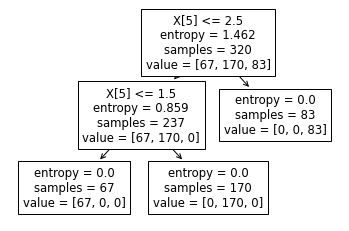

In [30]:
#PLot the decision tree
tree.plot_tree(model);

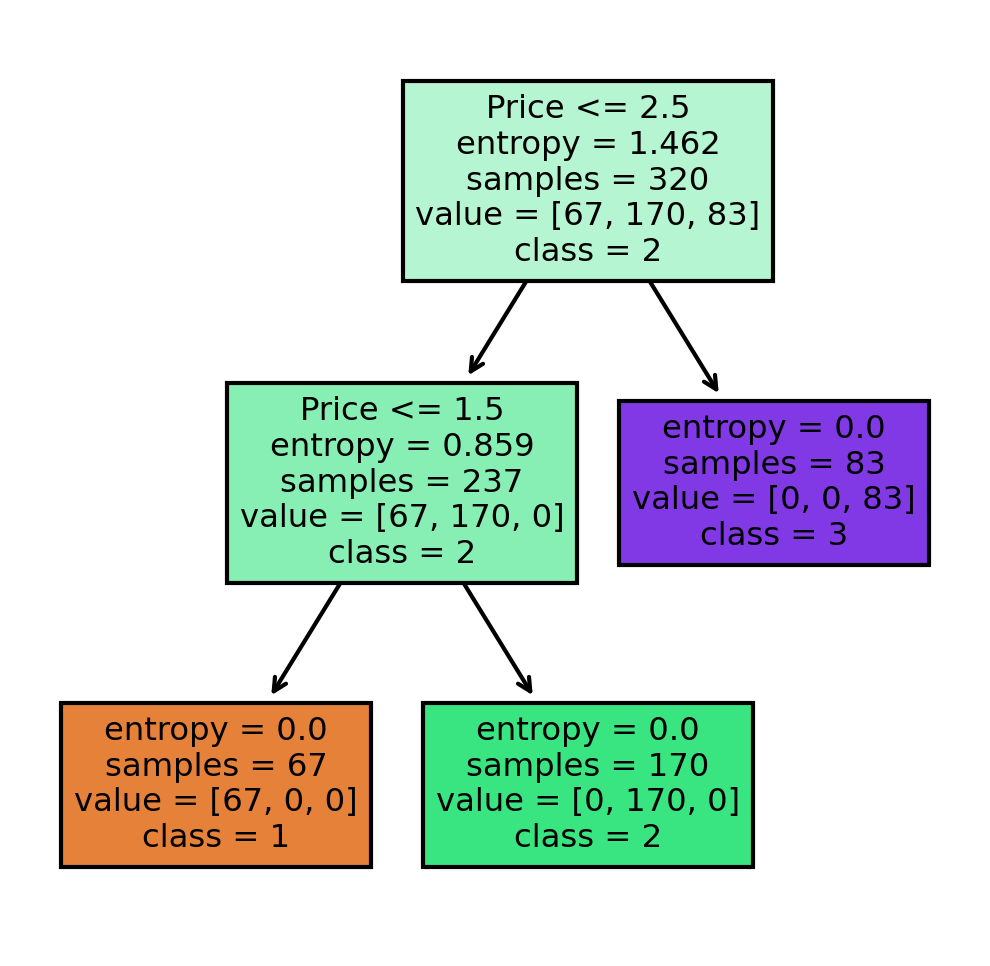

In [31]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [32]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

2    49
1    18
3    13
dtype: int64

In [33]:
preds

array([1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 2, 2, 3, 2, 2,
       2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 3, 3, 2, 2, 2, 2, 3, 1,
       1, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3], dtype=int64)

In [34]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0       1   2   3
ShelveLoc            
1          18   0   0
2           0  49   0
3           0   0  13

In [35]:
# Accuracy 
np.mean(preds==y_test)

1.0

In [36]:
#Building Decision Tree Classifier (CART) using Gini Criteria
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [37]:
model_gini

DecisionTreeClassifier(max_depth=3)

In [38]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0